In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('mpipe_mpjpe_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

                                            nombre_imagen image_size  threshold  cantidad_true_keypoints  true_keypoints_visible  cantidad_pred_keypoints  pred_keypoints_visible  mpjpe_pixels     mpjpe
0  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256        0.1                       17                      17                       17                      17      6.053319  0.020609
1  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256        0.5                       17                      17                       17                      17      6.053319  0.020609
2  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256        0.9                       17                      17                       17                      17      6.053319  0.020609
3  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg    144x256        0.1                       17                      12                       17                      12      5.009029 

In [2]:
mpjpe_stats =df['mpjpe_pixels'].describe()
print(mpjpe_stats.to_string())

count    747.000000
mean       6.156091
std        6.932246
min        2.487265
25%        4.139514
50%        5.014513
75%        6.189272
max       98.588321


In [3]:
mpjpe = df['mpjpe'].describe()
print(mpjpe.to_string())

count    747.000000
mean       0.020970
std        0.023634
min        0.008496
25%        0.014147
50%        0.017054
75%        0.021037
max        0.336213


# Diagrama de caja

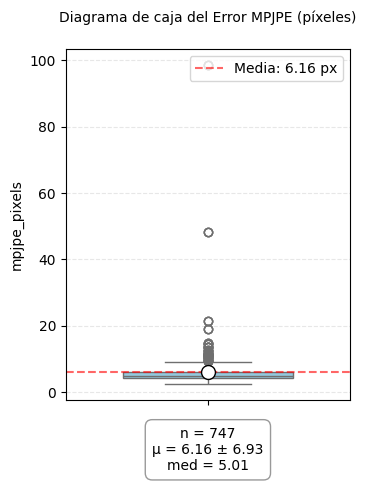

In [4]:
plt.figure(figsize=(3.7, 5))  # Tamaño ampliado

plt.rcParams.update({
    'font.size': 10,          # Tamaño de fuente base
    'axes.titlesize': 10,     # Tamaño de fuente para títulos
    'axes.labelsize': 10,     # Tamaño de fuente para etiquetas de ejes
    'xtick.labelsize': 10,    # Tamaño de fuente para etiquetas del eje x
    'ytick.labelsize': 10     # Tamaño de fuente para etiquetas del eje y
})

# Boxplot vertical para MPJPE
sns.boxplot(
    data=df,
    y='mpjpe_pixels',  # Eje Y para orientación vertical
    showmeans=True,  # Mostrar media
    meanprops={
        'marker': 'o',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': 10
    },
    color='skyblue',  # Color único (usamos color en vez de palette para un solo grupo)
    width=0.6  # Ajustar ancho de la caja
)

# Personalización del gráfico
plt.title('Diagrama de caja del Error MPJPE (píxeles)', pad=20)
# plt.ylabel('Error en píxeles', fontsize=14)
plt.xlabel('')  # Eliminar etiqueta del eje X (no aplicable)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Anotaciones de estadísticas (usando mpjpe_stats previamente calculado)
plt.text(
    0.5,  # Posición X centrada (0.5 = centro)
    -0.2,  # Posición Y (negativa para colocarlo debajo)
    f"n = {int(mpjpe_stats['count'])}\nμ = {mpjpe_stats['mean']:.2f} ± {mpjpe_stats['std']:.2f}\nmed = {mpjpe_stats['50%']:.2f}",
    ha='center',
    fontsize=10,
    transform=plt.gca().transAxes,  # Corregido: usando plt.gca()
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
)

# Línea de referencia (opcional: error promedio)
plt.axhline(
    y=mpjpe_stats['mean'],
    color='red',
    linestyle='--',
    alpha=0.6,
    label=f'Media: {mpjpe_stats["mean"]:.2f} px'
)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Diagrama de caja por Threshold

<>:53: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\m'
/var/folders/jf/mtmp9vvj5qdfvc_x4zl5yz7m0000gn/T/ipykernel_5126/1723322887.py:53: SyntaxWarning: invalid escape sequence '\m'
  f"$\mu$ = {row['mean']:.2f}\n"
/var/folders/jf/mtmp9vvj5qdfvc_x4zl5yz7m0000gn/T/ipykernel_5126/1723322887.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot( # Guardamos la referencia al eje (ax)


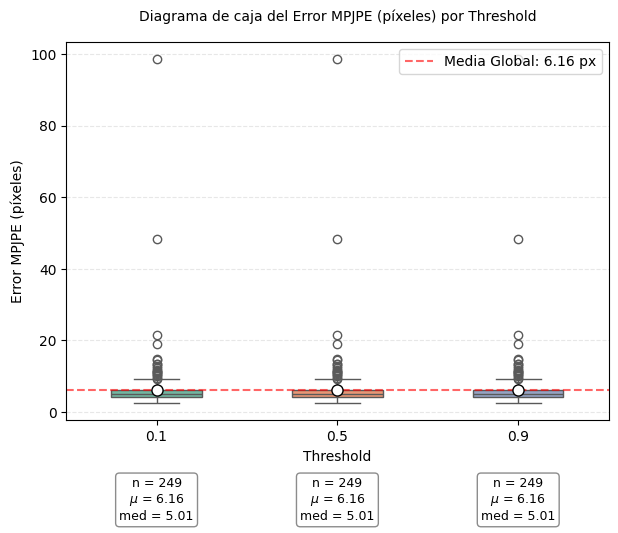

In [6]:
mpjpe_stats_global = df['mpjpe_pixels'].describe(percentiles=[.50])
mean_global = mpjpe_stats_global['mean']

mpjpe_stats_by_threshold = df.groupby('threshold')['mpjpe_pixels'].agg(
    count='count', 
    mean='mean', 
    std='std', 
    median='median'
).reset_index()
threshold_to_x_pos = {t: i for i, t in enumerate(mpjpe_stats_by_threshold['threshold'])}

plt.figure(figsize=(7, 6))  # Aumentamos la altura para acomodar el texto

plt.rcParams.update({
    'font.size': 10,          
    'axes.titlesize': 10,     
    'axes.labelsize': 10,     
    'xtick.labelsize': 10,    
    'ytick.labelsize': 10     
})

# Boxplot agrupado por 'threshold'
ax = sns.boxplot( # Guardamos la referencia al eje (ax)
    data=df,
    x='threshold',           
    y='mpjpe_pixels',        
    showmeans=True,          
    meanprops={
        'marker': 'o',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': 8      
    },
    palette='Set2',          
    width=0.5                
)

# Personalización del gráfico
plt.title('Diagrama de caja del Error MPJPE (píxeles) por Threshold', pad=15)
plt.ylabel('Error MPJPE (píxeles)')
plt.xlabel('Threshold') 
plt.grid(axis='y', linestyle='--', alpha=0.3)

# ⭐️ Implementación de plt.text() debajo de cada caja
for index, row in mpjpe_stats_by_threshold.iterrows():
    
    # 1. Obtener la posición X del grupo (0, 1, 2, ...)
    x_pos = threshold_to_x_pos[row['threshold']]
    
    # 2. Crear el texto de las estadísticas
    text_annotation = (
        f"n = {int(row['count'])}\n"
        f"$\mu$ = {row['mean']:.2f}\n"
        f"med = {row['median']:.2f}"
    )
    
    ax.text(
        x_pos, 
        ax.get_ylim()[0] - 0.15 * (ax.get_ylim()[1] - ax.get_ylim()[0]), # Y: Posición relativa debajo del eje
        text_annotation,
        ha='center',
        va='top', # Alineación vertical superior
        fontsize=9,
        transform=ax.transData, # Usar coordenadas de datos (0, 1, 2...)
        bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round,pad=0.3')
    )

plt.axhline(
    y=mean_global,
    color='red',
    linestyle='--',
    alpha=0.6,
    label=f'Media Global: {mean_global:.2f} px'
)

plt.legend(loc='upper right')

plt.subplots_adjust(bottom=0.25)
plt.show()

# Histograma

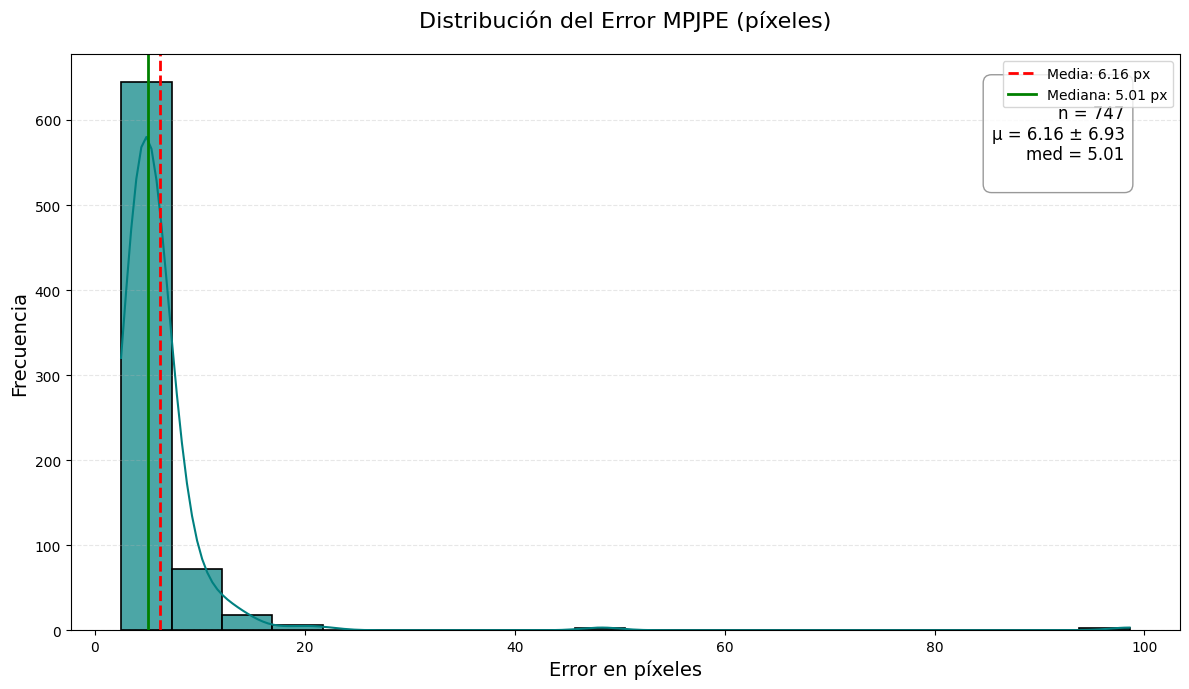

In [5]:
plt.figure(figsize=(12, 7))  # Tamaño ampliado para mejor legibilidad

# Histograma con KDE
hist = sns.histplot(
    data=df,
    x='mpjpe_pixels',
    bins=20,
    kde=True,
    color='teal',
    edgecolor='black',
    alpha=0.7,
    linewidth=1.2
)

# Líneas de media y mediana
plt.axvline(
    x=mpjpe_stats['mean'], 
    color='red', 
    linestyle='--', 
    linewidth=2,
    label=f'Media: {mpjpe_stats["mean"]:.2f} px'
)
plt.axvline(
    x=mpjpe_stats['50%'], 
    color='green', 
    linestyle='-', 
    linewidth=2,
    label=f'Mediana: {mpjpe_stats["50%"]:.2f} px'
)

# Personalización del gráfico
plt.title('Distribución del Error MPJPE (píxeles)', fontsize=16, pad=20)
plt.xlabel('Error en píxeles', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Leyenda con estadísticas clave
stats_text = f"""
n = {int(mpjpe_stats['count'])}
μ = {mpjpe_stats['mean']:.2f} ± {mpjpe_stats['std']:.2f}
med = {mpjpe_stats['50%']:.2f}
"""
plt.text(
    0.95, 0.95,  # Posición (x,y) en coordenadas relativas (0 a 1)
    stats_text,
    transform=plt.gca().transAxes,
    ha='right',
    va='top',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Histograma por Threshold

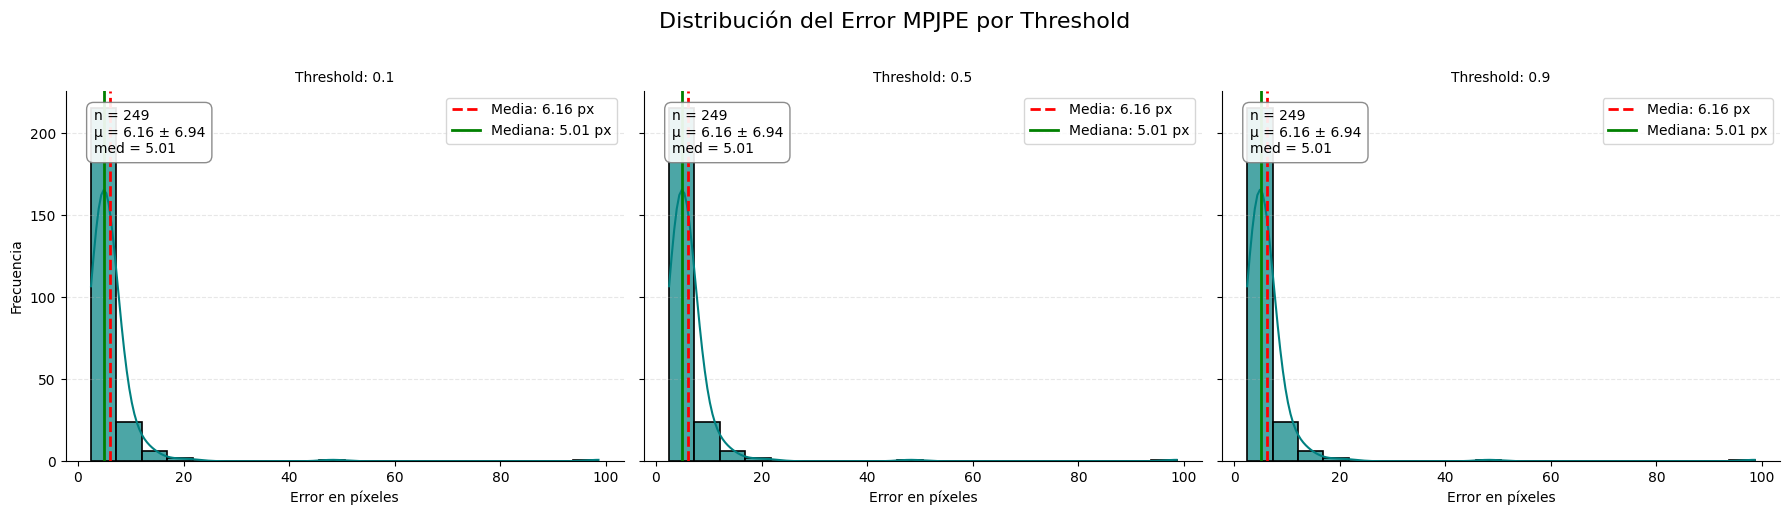

In [7]:
# Crear la figura con subplots por threshold
g = sns.FacetGrid(
    data=df,
    col='threshold',
    col_wrap=3,
    height=5,
    aspect=1.2,
    sharex=True,
    sharey=True
)

# Aplicar histograma a cada facet
g.map_dataframe(
    sns.histplot,
    x='mpjpe_pixels',
    bins=20,
    kde=True,
    color='teal',
    edgecolor='black',
    alpha=0.7,
    linewidth=1.2
)

# Calcular estadísticas para cada threshold
threshold_stats = df.groupby('threshold')['mpjpe_pixels'].describe()

# Añadir líneas de media y mediana a cada subplot
for ax, threshold in zip(g.axes.flat, g.col_names):
    stats = threshold_stats.loc[threshold]
    
    # Línea de media
    ax.axvline(
        x=stats['mean'], 
        color='red', 
        linestyle='--', 
        linewidth=2,
        label=f'Media: {stats["mean"]:.2f} px'
    )
    
    # Línea de mediana
    ax.axvline(
        x=stats['50%'], 
        color='green', 
        linestyle='-', 
        linewidth=2,
        label=f'Mediana: {stats["50%"]:.2f} px'
    )
    
    # Texto con estadísticas - posición alternada para evitar superposición
    stats_text = f"n = {int(stats['count'])}\nμ = {stats['mean']:.2f} ± {stats['std']:.2f}\nmed = {stats['50%']:.2f}"
    
    # Alternar posición del texto para evitar superposición con líneas verticales
    ax.text(
        0.05, 0.95,  # Esquina superior izquierda
        stats_text,
        transform=ax.transAxes,
        ha='left',
        va='top',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round,pad=0.5')
    )
    
    ax.legend(loc='upper right')
    ax.set_title(f'Threshold: {threshold}')
    ax.grid(axis='y', linestyle='--', alpha=0.3)

g.set_axis_labels('Error en píxeles', 'Frecuencia')
g.fig.suptitle('Distribución del Error MPJPE por Threshold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()